In [1]:
from keras.datasets import mnist
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
random.seed(171276)

In [6]:
from sklearn.model_selection import train_test_split
(train_data, train_label), (test_data, test_label) = mnist.load_data()
train_x, test_x, train_y, test_y = train_test_split(train_data, train_label, \
                                                    test_size = 5.0/6.0, random_state = 171276)
num_data = train_x.shape[1]*train_x.shape[2]
train_x = train_x.reshape(train_x.shape[0], num_data).astype('float32')
test_x = test_x.reshape(test_x.shape[0], num_data).astype('float32')


In [20]:
from sklearn.model_selection import train_test_split
(train_data, train_label), (test_data, test_label) = mnist.load_data()
train_x, test_x, train_y, test_y = train_test_split(train_data, train_label, \
                                                    test_size = 1.0/6.0, random_state = 171276)
num_data = train_x.shape[1]*train_x.shape[2]
x_train = train_x.reshape(train_x.shape[0], num_data).astype('float32')
x_test = test_x.reshape(test_x.shape[0], num_data).astype('float32')

# standardize to 0-1
x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)
num_classes = y_test.shape[1]

## 3. 
### I. 

In [10]:
def network_model1():
    model = Sequential()
    model.add(Dense(512, input_dim=num_data, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [52]:
network1 = network_model1()

fit1 = network1.fit(x_train, y_train, validation_data=(x_test, y_test), \
                       epochs=200, batch_size=512, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 1s - loss: 0.4896 - acc: 0.8469 - val_loss: 0.1716 - val_acc: 0.9474
Epoch 2/200
 - 1s - loss: 0.1563 - acc: 0.9530 - val_loss: 0.1374 - val_acc: 0.9572
Epoch 3/200
 - 1s - loss: 0.0970 - acc: 0.9706 - val_loss: 0.1079 - val_acc: 0.9689
Epoch 4/200
 - 1s - loss: 0.0617 - acc: 0.9809 - val_loss: 0.2030 - val_acc: 0.9467
Epoch 5/200
 - 1s - loss: 0.0450 - acc: 0.9867 - val_loss: 0.1222 - val_acc: 0.9669
Epoch 6/200
 - 1s - loss: 0.0361 - acc: 0.9887 - val_loss: 0.1029 - val_acc: 0.9731
Epoch 7/200
 - 1s - loss: 0.0284 - acc: 0.9916 - val_loss: 0.1087 - val_acc: 0.9747
Epoch 8/200
 - 1s - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0983 - val_acc: 0.9771
Epoch 9/200
 - 1s - loss: 0.0219 - acc: 0.9934 - val_loss: 0.0970 - val_acc: 0.9775
Epoch 10/200
 - 1s - loss: 0.0174 - acc: 0.9953 - val_loss: 0.1010 - val_acc: 0.9768
Epoch 11/200
 - 1s - loss: 0.0191 - acc: 0.9955 - val_loss: 0.1079 - val_acc: 0.9789
Epoch 12/200
 - 1s - los

Epoch 97/200
 - 1s - loss: 0.0061 - acc: 0.9992 - val_loss: 0.2434 - val_acc: 0.9776
Epoch 98/200
 - 1s - loss: 0.0100 - acc: 0.9987 - val_loss: 0.2196 - val_acc: 0.9777
Epoch 99/200
 - 1s - loss: 0.0059 - acc: 0.9992 - val_loss: 0.2310 - val_acc: 0.9803
Epoch 100/200
 - 1s - loss: 0.0072 - acc: 0.9991 - val_loss: 0.2089 - val_acc: 0.9802
Epoch 101/200
 - 1s - loss: 0.0056 - acc: 0.9992 - val_loss: 0.2114 - val_acc: 0.9799
Epoch 102/200
 - 1s - loss: 0.0069 - acc: 0.9991 - val_loss: 0.2056 - val_acc: 0.9822
Epoch 103/200
 - 1s - loss: 0.0087 - acc: 0.9989 - val_loss: 0.2114 - val_acc: 0.9796
Epoch 104/200
 - 1s - loss: 0.0045 - acc: 0.9995 - val_loss: 0.2057 - val_acc: 0.9813
Epoch 105/200
 - 1s - loss: 0.0048 - acc: 0.9995 - val_loss: 0.2070 - val_acc: 0.9821
Epoch 106/200
 - 1s - loss: 0.0112 - acc: 0.9985 - val_loss: 0.2170 - val_acc: 0.9805
Epoch 107/200
 - 1s - loss: 0.0046 - acc: 0.9992 - val_loss: 0.2098 - val_acc: 0.9809
Epoch 108/200
 - 1s - loss: 0.0051 - acc: 0.9994 - val_lo

Epoch 193/200
 - 1s - loss: 0.0125 - acc: 0.9989 - val_loss: 0.2287 - val_acc: 0.9816
Epoch 194/200
 - 1s - loss: 0.0060 - acc: 0.9994 - val_loss: 0.2389 - val_acc: 0.9818
Epoch 195/200
 - 1s - loss: 0.0114 - acc: 0.9990 - val_loss: 0.2836 - val_acc: 0.9792
Epoch 196/200
 - 1s - loss: 0.0040 - acc: 0.9996 - val_loss: 0.2597 - val_acc: 0.9804
Epoch 197/200
 - 1s - loss: 0.0083 - acc: 0.9992 - val_loss: 0.2478 - val_acc: 0.9812
Epoch 198/200
 - 1s - loss: 0.0066 - acc: 0.9994 - val_loss: 0.2620 - val_acc: 0.9793
Epoch 199/200
 - 1s - loss: 0.0054 - acc: 0.9995 - val_loss: 0.2478 - val_acc: 0.9820
Epoch 200/200
 - 1s - loss: 0.0067 - acc: 0.9992 - val_loss: 0.2405 - val_acc: 0.9811


In [53]:
scores1 = network1.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores1[1]*100))

Error: 1.89%


In [19]:
len(y_train)

60000

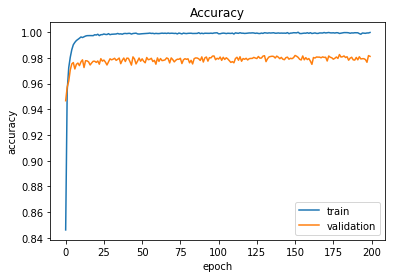

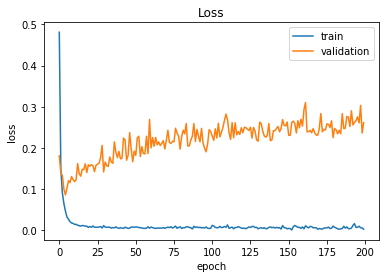

In [22]:
# Accuracy plot
plt.plot(fit1.history['acc'])
plt.plot(fit1.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# Loss plot
plt.plot(fit1.history['loss'])
plt.plot(fit1.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [25]:
degrade = []
for i in range(0, len(fit1.history['val_loss']) - 1): 
    difference = fit1.history['val_loss'][i+1] - fit1.history['val_loss'][i]
    if difference > 0: 
        degrade.append(i)
degrade[0]

4

In [26]:
print(fit1.history['val_loss'][4], fit1.history['val_loss'][5])

0.08538412885665894 0.10159510447978973


The minimum loss is at 5th epoch. The model begins to degrade from 6th epoch.

### II

In [27]:
def dropout():
    model = Sequential()
    model.add(Dense(512, input_dim=num_data, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [29]:
network2 = dropout()

fit2 = network2.fit(x_train, y_train, validation_data=(x_test, y_test), \
                       epochs=200, batch_size=512, verbose=2)

scores2 = network2.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores2[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 1s - loss: 0.7601 - acc: 0.7472 - val_loss: 0.2399 - val_acc: 0.9268
Epoch 2/200
 - 1s - loss: 0.2829 - acc: 0.9185 - val_loss: 0.1787 - val_acc: 0.9475
Epoch 3/200
 - 1s - loss: 0.2064 - acc: 0.9408 - val_loss: 0.1318 - val_acc: 0.9610
Epoch 4/200
 - 1s - loss: 0.1739 - acc: 0.9504 - val_loss: 0.1263 - val_acc: 0.9637
Epoch 5/200
 - 1s - loss: 0.1484 - acc: 0.9573 - val_loss: 0.1128 - val_acc: 0.9682
Epoch 6/200
 - 1s - loss: 0.1347 - acc: 0.9616 - val_loss: 0.1152 - val_acc: 0.9676
Epoch 7/200
 - 1s - loss: 0.1193 - acc: 0.9669 - val_loss: 0.1066 - val_acc: 0.9706
Epoch 8/200
 - 1s - loss: 0.1083 - acc: 0.9694 - val_loss: 0.1000 - val_acc: 0.9738
Epoch 9/200
 - 1s - loss: 0.1023 - acc: 0.9726 - val_loss: 0.0944 - val_acc: 0.9733
Epoch 10/200
 - 1s - loss: 0.0969 - acc: 0.9730 - val_loss: 0.0932 - val_acc: 0.9756
Epoch 11/200
 - 1s - loss: 0.0901 - acc: 0.9758 - val_loss: 0.0939 - val_acc: 0.9759
Epoch 12/200
 - 1s - los

Epoch 97/200
 - 1s - loss: 0.0548 - acc: 0.9915 - val_loss: 0.1416 - val_acc: 0.9793
Epoch 98/200
 - 1s - loss: 0.0564 - acc: 0.9906 - val_loss: 0.1352 - val_acc: 0.9806
Epoch 99/200
 - 1s - loss: 0.0527 - acc: 0.9911 - val_loss: 0.1338 - val_acc: 0.9805
Epoch 100/200
 - 1s - loss: 0.0551 - acc: 0.9911 - val_loss: 0.1350 - val_acc: 0.9813
Epoch 101/200
 - 1s - loss: 0.0545 - acc: 0.9912 - val_loss: 0.1700 - val_acc: 0.9775
Epoch 102/200
 - 1s - loss: 0.0505 - acc: 0.9923 - val_loss: 0.1591 - val_acc: 0.9794
Epoch 103/200
 - 1s - loss: 0.0530 - acc: 0.9910 - val_loss: 0.1498 - val_acc: 0.9797
Epoch 104/200
 - 1s - loss: 0.0506 - acc: 0.9922 - val_loss: 0.1556 - val_acc: 0.9795
Epoch 105/200
 - 1s - loss: 0.0554 - acc: 0.9912 - val_loss: 0.1516 - val_acc: 0.9810
Epoch 106/200
 - 1s - loss: 0.0624 - acc: 0.9912 - val_loss: 0.1443 - val_acc: 0.9799
Epoch 107/200
 - 1s - loss: 0.0585 - acc: 0.9910 - val_loss: 0.1472 - val_acc: 0.9804
Epoch 108/200
 - 1s - loss: 0.0587 - acc: 0.9908 - val_lo

Epoch 193/200
 - 1s - loss: 0.0734 - acc: 0.9915 - val_loss: 0.1979 - val_acc: 0.9796
Epoch 194/200
 - 1s - loss: 0.0677 - acc: 0.9924 - val_loss: 0.2182 - val_acc: 0.9788
Epoch 195/200
 - 1s - loss: 0.0747 - acc: 0.9924 - val_loss: 0.2197 - val_acc: 0.9789
Epoch 196/200
 - 1s - loss: 0.0736 - acc: 0.9914 - val_loss: 0.1860 - val_acc: 0.9798
Epoch 197/200
 - 1s - loss: 0.0669 - acc: 0.9924 - val_loss: 0.2095 - val_acc: 0.9786
Epoch 198/200
 - 1s - loss: 0.0749 - acc: 0.9920 - val_loss: 0.2029 - val_acc: 0.9785
Epoch 199/200
 - 1s - loss: 0.0776 - acc: 0.9910 - val_loss: 0.1918 - val_acc: 0.9795
Epoch 200/200
 - 1s - loss: 0.0719 - acc: 0.9920 - val_loss: 0.2118 - val_acc: 0.9788
Error: 2.12%


In [49]:
scores2 = network2.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores2[1]*100))

Error: 2.12%


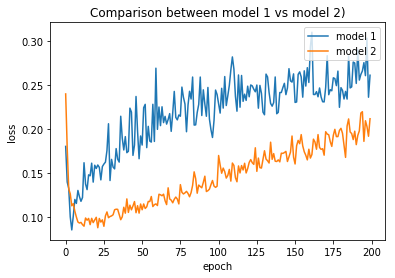

In [50]:
plt.plot(fit1.history['val_loss'])
plt.plot(fit2.history['val_loss'])
plt.title('Comparison between model 1 vs model 2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2'], loc='upper right')
plt.show()

While model 1 has a better performance from 1st to 6th epoch, model 2 performs better from 7th epoch onwards, and it has a lower minimum loss. 

### III

In [42]:
from keras.regularizers import l1, l2
def weightl1():
    model = Sequential()
    model.add(Dense(512, input_dim=num_data, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [43]:
def weightl2():
    model = Sequential()
    model.add(Dense(512, input_dim=num_data, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [46]:
network3 = weightl1()

fit3 = network3.fit(x_train, y_train, validation_data=(x_test, y_test), \
                       epochs=200, batch_size=512, verbose=2)

scores3 = network3.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores3[1]*100))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", input_dim=784, kernel_initializer="normal", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer="normal")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer="normal")`
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer="normal")`
  import sys


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 1s - loss: 18.2930 - acc: 0.7038 - val_loss: 6.3674 - val_acc: 0.7338
Epoch 2/200
 - 1s - loss: 4.1344 - acc: 0.7998 - val_loss: 2.8703 - val_acc: 0.8635
Epoch 3/200
 - 1s - loss: 2.5389 - acc: 0.8357 - val_loss: 2.1972 - val_acc: 0.8656
Epoch 4/200
 - 1s - loss: 2.0343 - acc: 0.8603 - val_loss: 1.8971 - val_acc: 0.8729
Epoch 5/200
 - 1s - loss: 1.7799 - acc: 0.8758 - val_loss: 1.7854 - val_acc: 0.8448
Epoch 6/200
 - 1s - loss: 1.6209 - acc: 0.8883 - val_loss: 1.5342 - val_acc: 0.9002
Epoch 7/200
 - 1s - loss: 1.5103 - acc: 0.8968 - val_loss: 1.5234 - val_acc: 0.8837
Epoch 8/200
 - 1s - loss: 1.4350 - acc: 0.9042 - val_loss: 1.4073 - val_acc: 0.9081
Epoch 9/200
 - 1s - loss: 1.3722 - acc: 0.9109 - val_loss: 1.3687 - val_acc: 0.9145
Epoch 10/200
 - 1s - loss: 1.3211 - acc: 0.9181 - val_loss: 1.3126 - val_acc: 0.9179
Epoch 11/200
 - 1s - loss: 1.2789 - acc: 0.9224 - val_loss: 1.2812 - val_acc: 0.9219
Epoch 12/200
 - 1s - lo

Epoch 97/200
 - 1s - loss: 0.9011 - acc: 0.9622 - val_loss: 0.9113 - val_acc: 0.9584
Epoch 98/200
 - 1s - loss: 0.9003 - acc: 0.9620 - val_loss: 0.9299 - val_acc: 0.9544
Epoch 99/200
 - 1s - loss: 0.9002 - acc: 0.9617 - val_loss: 0.9140 - val_acc: 0.9586
Epoch 100/200
 - 1s - loss: 0.9001 - acc: 0.9606 - val_loss: 0.9334 - val_acc: 0.9512
Epoch 101/200
 - 1s - loss: 0.8996 - acc: 0.9614 - val_loss: 0.9189 - val_acc: 0.9549
Epoch 102/200
 - 1s - loss: 0.8983 - acc: 0.9625 - val_loss: 0.9122 - val_acc: 0.9571
Epoch 103/200
 - 1s - loss: 0.9000 - acc: 0.9609 - val_loss: 0.9228 - val_acc: 0.9547
Epoch 104/200
 - 1s - loss: 0.8960 - acc: 0.9623 - val_loss: 0.9230 - val_acc: 0.9546
Epoch 105/200
 - 1s - loss: 0.8961 - acc: 0.9632 - val_loss: 0.9181 - val_acc: 0.9558
Epoch 106/200
 - 1s - loss: 0.8965 - acc: 0.9622 - val_loss: 0.9039 - val_acc: 0.9599
Epoch 107/200
 - 1s - loss: 0.8961 - acc: 0.9616 - val_loss: 0.9661 - val_acc: 0.9392
Epoch 108/200
 - 1s - loss: 0.8969 - acc: 0.9608 - val_lo

Epoch 193/200
 - 1s - loss: 0.8682 - acc: 0.9645 - val_loss: 0.8769 - val_acc: 0.9621
Epoch 194/200
 - 1s - loss: 0.8691 - acc: 0.9636 - val_loss: 0.8813 - val_acc: 0.9607
Epoch 195/200
 - 1s - loss: 0.8688 - acc: 0.9637 - val_loss: 0.8998 - val_acc: 0.9530
Epoch 196/200
 - 1s - loss: 0.8661 - acc: 0.9646 - val_loss: 0.8964 - val_acc: 0.9578
Epoch 197/200
 - 1s - loss: 0.8668 - acc: 0.9639 - val_loss: 0.8955 - val_acc: 0.9539
Epoch 198/200
 - 1s - loss: 0.8657 - acc: 0.9637 - val_loss: 0.8947 - val_acc: 0.9577
Epoch 199/200
 - 1s - loss: 0.8676 - acc: 0.9632 - val_loss: 0.9279 - val_acc: 0.9445
Epoch 200/200
 - 1s - loss: 0.8636 - acc: 0.9650 - val_loss: 0.9027 - val_acc: 0.9530
Error: 4.70%


In [67]:
network4 = weightl2()

fit4 = network4.fit(x_train, y_train, validation_data=(x_test, y_test), \
                       epochs=200, batch_size=512, verbose=2)

scores4 = network4.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores4[1]*100))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", input_dim=784, kernel_initializer="normal", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer="normal")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer="normal")`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg..., kernel_initializer=

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 2s - loss: 2.3527 - acc: 0.8271 - val_loss: 1.5296 - val_acc: 0.8857
Epoch 2/200
 - 1s - loss: 1.0805 - acc: 0.9349 - val_loss: 0.7708 - val_acc: 0.9545
Epoch 3/200
 - 1s - loss: 0.6620 - acc: 0.9502 - val_loss: 0.5706 - val_acc: 0.9468
Epoch 4/200
 - 1s - loss: 0.4723 - acc: 0.9598 - val_loss: 0.4416 - val_acc: 0.9528
Epoch 5/200
 - 1s - loss: 0.3769 - acc: 0.9642 - val_loss: 0.3750 - val_acc: 0.9544
Epoch 6/200
 - 1s - loss: 0.3271 - acc: 0.9667 - val_loss: 0.3093 - val_acc: 0.9667
Epoch 7/200
 - 1s - loss: 0.2794 - acc: 0.9720 - val_loss: 0.2849 - val_acc: 0.9645
Epoch 8/200
 - 1s - loss: 0.2559 - acc: 0.9723 - val_loss: 0.2596 - val_acc: 0.9676
Epoch 9/200
 - 1s - loss: 0.2343 - acc: 0.9750 - val_loss: 0.2460 - val_acc: 0.9682
Epoch 10/200
 - 1s - loss: 0.2172 - acc: 0.9766 - val_loss: 0.2330 - val_acc: 0.9698
Epoch 11/200
 - 1s - loss: 0.2035 - acc: 0.9780 - val_loss: 0.2351 - val_acc: 0.9673
Epoch 12/200
 - 1s - los

Epoch 97/200
 - 1s - loss: 0.0860 - acc: 0.9911 - val_loss: 0.1312 - val_acc: 0.9786
Epoch 98/200
 - 1s - loss: 0.0872 - acc: 0.9915 - val_loss: 0.2413 - val_acc: 0.9511
Epoch 99/200
 - 1s - loss: 0.0827 - acc: 0.9920 - val_loss: 0.1306 - val_acc: 0.9792
Epoch 100/200
 - 1s - loss: 0.0864 - acc: 0.9909 - val_loss: 0.1370 - val_acc: 0.9784
Epoch 101/200
 - 1s - loss: 0.0842 - acc: 0.9920 - val_loss: 0.1369 - val_acc: 0.9771
Epoch 102/200
 - 1s - loss: 0.0854 - acc: 0.9914 - val_loss: 0.1404 - val_acc: 0.9757
Epoch 103/200
 - 1s - loss: 0.0824 - acc: 0.9923 - val_loss: 0.1399 - val_acc: 0.9768
Epoch 104/200
 - 1s - loss: 0.0850 - acc: 0.9911 - val_loss: 0.1399 - val_acc: 0.9765
Epoch 105/200
 - 1s - loss: 0.0846 - acc: 0.9914 - val_loss: 0.1657 - val_acc: 0.9706
Epoch 106/200
 - 1s - loss: 0.0825 - acc: 0.9926 - val_loss: 0.1471 - val_acc: 0.9740
Epoch 107/200
 - 1s - loss: 0.0850 - acc: 0.9917 - val_loss: 0.1350 - val_acc: 0.9769
Epoch 108/200
 - 1s - loss: 0.0834 - acc: 0.9919 - val_lo

Epoch 193/200
 - 1s - loss: 0.0721 - acc: 0.9936 - val_loss: 0.1510 - val_acc: 0.9730
Epoch 194/200
 - 1s - loss: 0.0762 - acc: 0.9925 - val_loss: 0.1350 - val_acc: 0.9770
Epoch 195/200
 - 1s - loss: 0.0792 - acc: 0.9918 - val_loss: 0.1302 - val_acc: 0.9781
Epoch 196/200
 - 1s - loss: 0.0730 - acc: 0.9932 - val_loss: 0.1655 - val_acc: 0.9685
Epoch 197/200
 - 1s - loss: 0.0739 - acc: 0.9933 - val_loss: 0.2746 - val_acc: 0.9354
Epoch 198/200
 - 1s - loss: 0.0817 - acc: 0.9909 - val_loss: 0.1294 - val_acc: 0.9779
Epoch 199/200
 - 1s - loss: 0.0766 - acc: 0.9921 - val_loss: 0.1231 - val_acc: 0.9784
Epoch 200/200
 - 1s - loss: 0.0728 - acc: 0.9929 - val_loss: 0.1516 - val_acc: 0.9718
Error: 2.82%


In [48]:
scores4 = network4.evaluate(x_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores4[1]*100))

Error: 2.07%


<IPython.core.display.Javascript object>


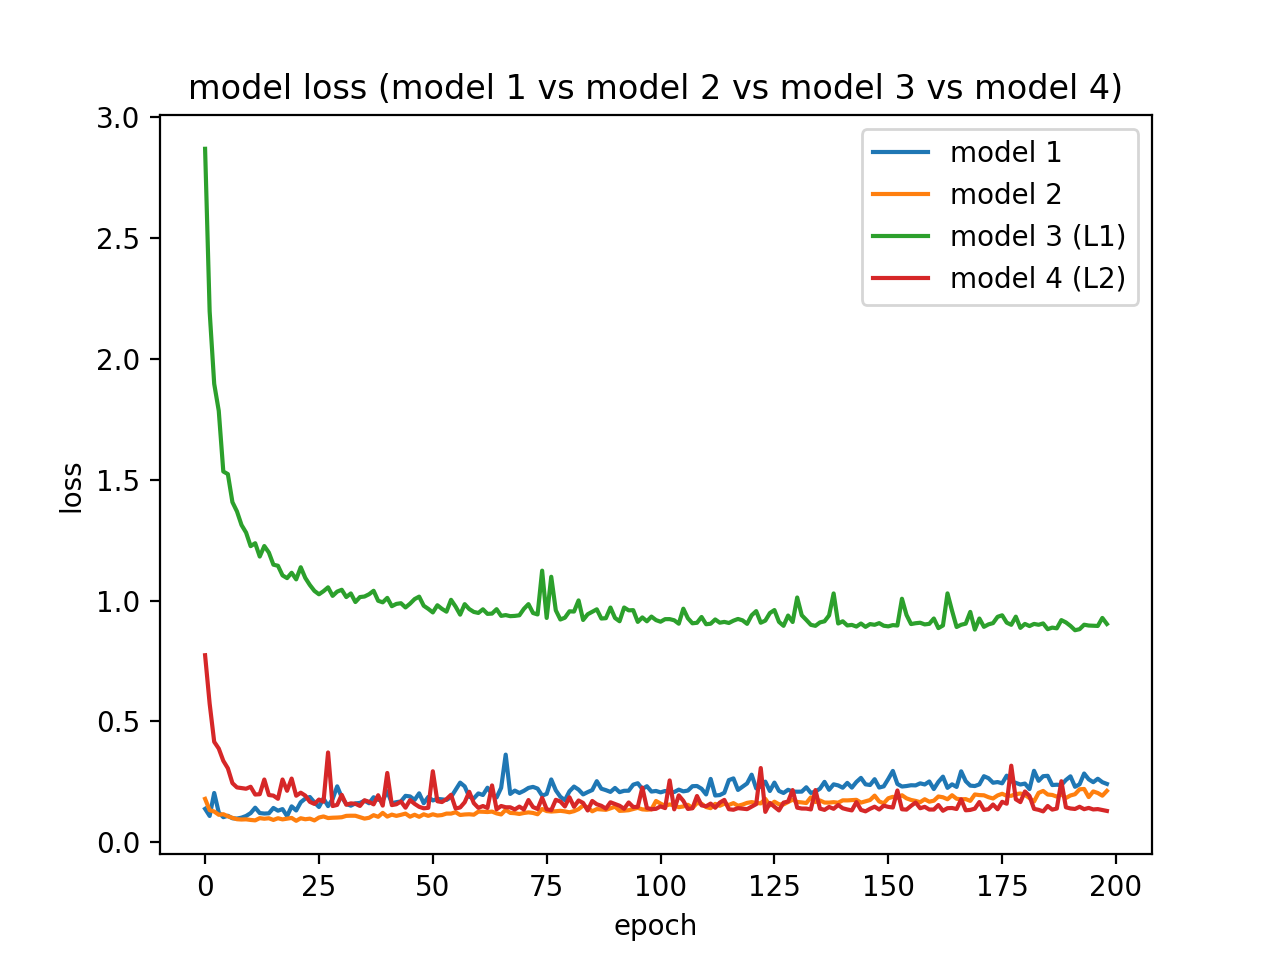

In [56]:
%matplotlib notebook
# validation Loss plot
plt.plot(fit1.history['val_loss'][1:])
plt.plot(fit2.history['val_loss'][1:])
plt.plot(fit3.history['val_loss'][1:])
plt.plot(fit4.history['val_loss'][1:])
plt.title('model loss (model 1 vs model 2 vs model 3 vs model 4)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2', 'model 3 (L1)', 'model 4 (L2)'], loc='upper right')
plt.show()

### iv

In [54]:
scores1 = network1.evaluate(x_test, y_test, verbose=0)
scores2 = network2.evaluate(x_test, y_test, verbose=0)
scores3 = network3.evaluate(x_test, y_test, verbose=0)
scores4 = network3.evaluate(x_test, y_test, verbose=0)

In [57]:
print(scores1[0], scores2[0], scores3[0], scores4[0])

0.24051477211098518 0.21175467873391812 0.9027491733551025 0.9027491733551025


In [58]:
print(min(fit1.history['val_loss']), \
      min(fit2.history['val_loss']), \
      min(fit3.history['val_loss']), \
      min(fit4.history['val_loss']))

0.09703404812812805 0.08786875929832459 0.8769052702903748 0.1248122360944748


In [60]:
fit2.history['val_loss'].index(min(fit2.history['val_loss']))

21

The dropout model has the smallest minimum validation loss and smallest average score. 
Its minimum is at the 18th epoch. 

In [65]:
data_train = train_data.reshape(train_data.shape[0], num_data).astype('float32')
data_test = test_data.reshape(test_data.shape[0], num_data).astype('float32')

# standardize to 0-1
data_train = data_train / 255
data_test = data_test / 255

label_train = np_utils.to_categorical(train_label)
label_test = np_utils.to_categorical(test_label)


network5 = dropout()

fit55 = network5.fit(data_train, label_train, epochs=18, batch_size=512, verbose=2)

scores5 = network5.evaluate(data_test, label_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores5[1]*100))

Epoch 1/18
 - 2s - loss: 0.6797 - acc: 0.7769
Epoch 2/18
 - 1s - loss: 0.2550 - acc: 0.9257
Epoch 3/18
 - 1s - loss: 0.1923 - acc: 0.9450
Epoch 4/18
 - 1s - loss: 0.1614 - acc: 0.9539
Epoch 5/18
 - 1s - loss: 0.1393 - acc: 0.9602
Epoch 6/18
 - 1s - loss: 0.1250 - acc: 0.9655
Epoch 7/18
 - 1s - loss: 0.1161 - acc: 0.9681
Epoch 8/18
 - 1s - loss: 0.1073 - acc: 0.9706
Epoch 9/18
 - 1s - loss: 0.0986 - acc: 0.9727
Epoch 10/18
 - 1s - loss: 0.0947 - acc: 0.9740
Epoch 11/18
 - 1s - loss: 0.0884 - acc: 0.9753
Epoch 12/18
 - 1s - loss: 0.0828 - acc: 0.9771
Epoch 13/18
 - 1s - loss: 0.0825 - acc: 0.9775
Epoch 14/18
 - 1s - loss: 0.0799 - acc: 0.9787
Epoch 15/18
 - 1s - loss: 0.0783 - acc: 0.9790
Epoch 16/18
 - 1s - loss: 0.0734 - acc: 0.9804
Epoch 17/18
 - 1s - loss: 0.0713 - acc: 0.9814
Epoch 18/18
 - 1s - loss: 0.0710 - acc: 0.9818
Baseline Error: 1.76%


In [66]:
scores5[1]

0.9824

The accuracy is moderately better (98.24%) compared to the textbook model (97.85%)